# Import modules
Let's import all the basic modules we will be needing for this project.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

%matplotlib - to enable the inline plotting.


# Load the Dataset


In [ ]:
df= pd.read_csv('/content/train.csv')
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
## statistical info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We will convert the string values into integers later.

# Exploratory Data Analysis


Before preprocessing let us explore the categorical columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


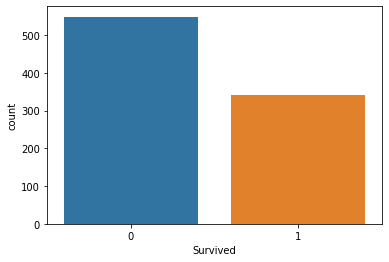

In [ ]:
## categorical attributes
sns.countplot(df['Survived'])

In [ ]:
len(df[df['Survived']==0])/len(df[df['Survived']==1])

1.605263157894737

In [ ]:
len(df[df['Survived']==1])/len(df[df['Survived']==0])

0.6229508196721312

1/3 of the data only have the label 1 , wde can say its umbalanced data that we have

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


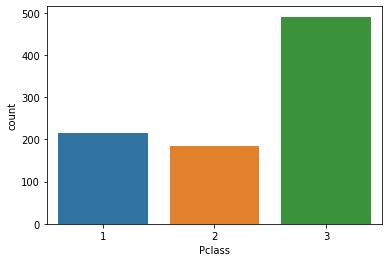

In [ ]:
sns.countplot(df['Pclass'])


There is uneven distribution due to the 3rd class passengers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


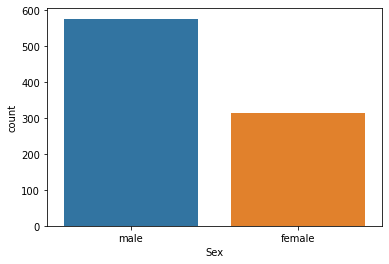

In [ ]:
sns.countplot(df['Sex'])

We observe more males than females.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


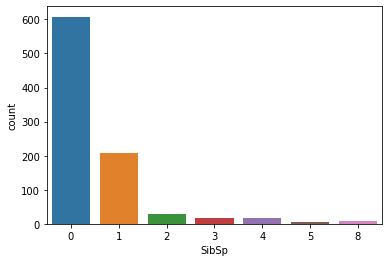

In [ ]:
sns.countplot(df['SibSp'])


0 indicates that the passenger is travelling solo.
and we have a lot of them, the majority..



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


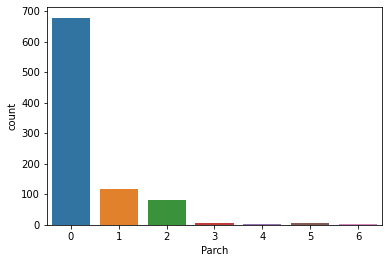

In [ ]:
sns.countplot(df['Parch'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


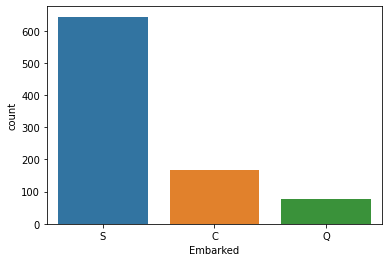

In [ ]:
sns.countplot(df['Embarked'])

Embarked contains the boarding port/cities of passengers.

There are three cities with S having the more number of values.

## Let us explore the numerical columns.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


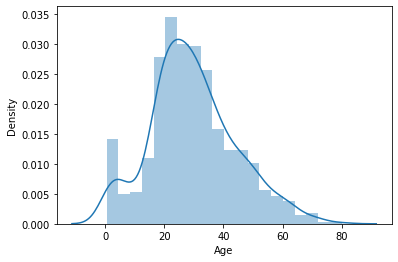

In [ ]:
sns.distplot(df["Age"])

The graph shows a bell curve indicating a normal distribution.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


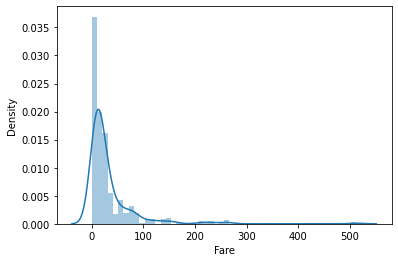

In [ ]:
sns.distplot(df["Fare"])

We need to do preprocessing these data to convert the right-skewed curve into a normal distribution.

Let us compare ticket classes by creating a new graph using a pivot table.



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

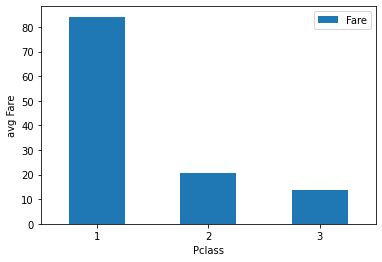

In [ ]:
classeFare = df.pivot_table(index = 'Pclass', values='Fare')
classeFare.plot(kind='bar')
plt.ylabel('avg Fare')
plt.xticks(rotation = 0)


that's clair that 1 pclass is way more expensive than the others
the overage ebtween 2 and 3 pclass is not so much different.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

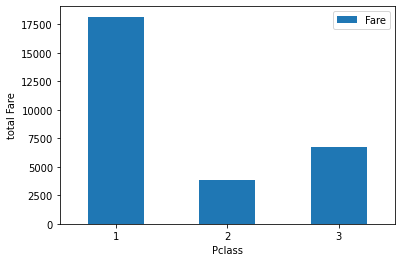

In [ ]:
classfare2 = df.pivot_table(index = 'Pclass', values ='Fare',aggfunc=np.sum)
classfare2.plot(kind='bar')
plt.ylabel("total Fare")
plt.xticks(rotation=0)

let us now plot the relation between survived attr and Pclass attr

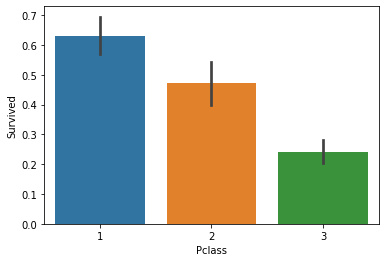

In [ ]:
sns.barplot(data=df,x='Pclass',y='Survived')

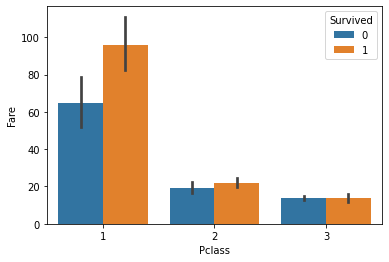

In [ ]:
sns.barplot(data=df,x='Pclass',y='Fare',hue='Survived')

This plot show a comparison of survived passengers depending on the ticket fare and passenger class.

Let's change the horizontal and vertical axis of the graph.


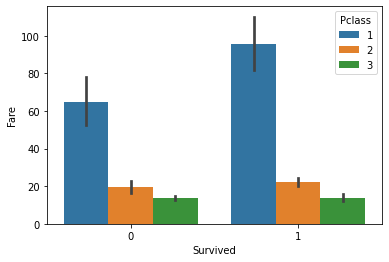

In [ ]:
sns.barplot(data=df, x='Survived',y='Fare',hue='Pclass')

# Data Preprocessing

Let us check for NULL values in the dataset.

In [ ]:
#df.isnull().sum() or
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let us remove column 'Cabin'.

In [ ]:
df=df.drop(columns=['Cabin'],axis =1)

The mean value of column 'Age'.

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Correlation Matrix

A correlation matrix is a multicells table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have a high correlation (value near to 1 or near to -1), we can neglect one variable from those two.

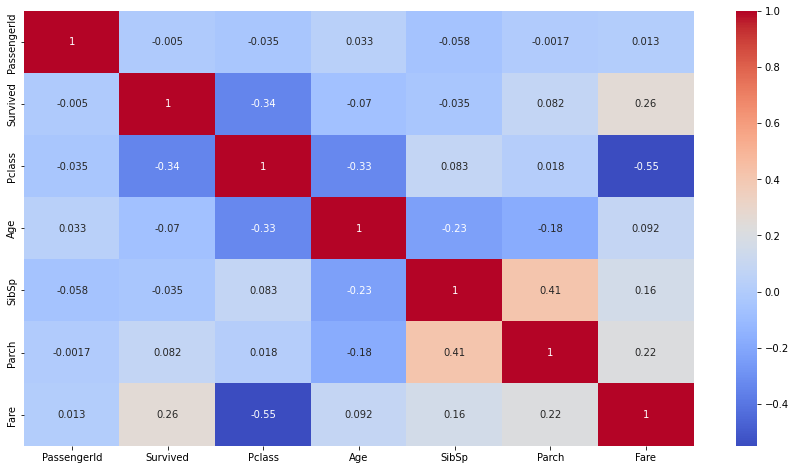

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
## drop unnecessary columns
df = df.drop(columns=['PassengerId','Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# oneHot encoding

In [ ]:
cat=df.select_dtypes(include=object).columns
cat


Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), cat)], remainder='passthrough')
data = columnTransformer.fit_transform(df)
column_name = columnTransformer.get_feature_names()
data =  pd.DataFrame(data, columns= column_name)
data.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,encoder__x0_male,encoder__x1_Q,encoder__x1_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833


# Train-Test Split

In [ ]:
y= data["Survived"]
X = data.drop(columns=['Survived'], axis=1)

# Model Training 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.8026905829596412
CV Score: 0.789008850668508


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7399103139013453
CV Score: 0.774464879794112


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.8159625886636119


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.7845521310652188


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226853304877283


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy: 0.8251121076233184
CV Score: 0.8294331805913


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

ModuleNotFoundError: ignored